# Importação de bibliotecas


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
import mplcyberpunk

# Coletando as cotações históricas

In [4]:
tickers = ['^BVSP', '^GSPC', 'BRL=X']

In [5]:
dados_mercado = yf.download(tickers, period = '6mo')

dados_mercado = dados_mercado['Adj Close']
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11,4.97754,126124.0,5117.939941
2024-03-12,4.97740,127668.0,5175.270020
2024-03-13,4.96870,128006.0,5165.310059
2024-03-14,4.96920,127690.0,5150.479980
2024-03-15,4.99270,126742.0,5117.089844
...,...,...,...
2024-09-04,5.64750,136111.0,5520.069824
2024-09-05,5.64200,136502.0,5503.410156
2024-09-06,5.56750,134572.0,5408.419922


# Tratamento de dados

In [6]:
dados_mercado.isnull().sum()

Ticker
BRL=X    0
^BVSP    4
^GSPC    6
dtype: int64

In [7]:
dados_mercado = dados_mercado.dropna()

In [8]:
dados_mercado.columns = ['DOLAR', 'IBOVESPA', 'S&P500']

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11,4.97754,126124.0,5117.939941
2024-03-12,4.97740,127668.0,5175.270020
2024-03-13,4.96870,128006.0,5165.310059
2024-03-14,4.96920,127690.0,5150.479980
2024-03-15,4.99270,126742.0,5117.089844
...,...,...,...
2024-09-03,5.61510,134353.0,5528.930176
2024-09-04,5.64750,136111.0,5520.069824
2024-09-05,5.64200,136502.0,5503.410156


# Criar gráficos de performace

In [9]:
plt.style.use('cyberpunk')

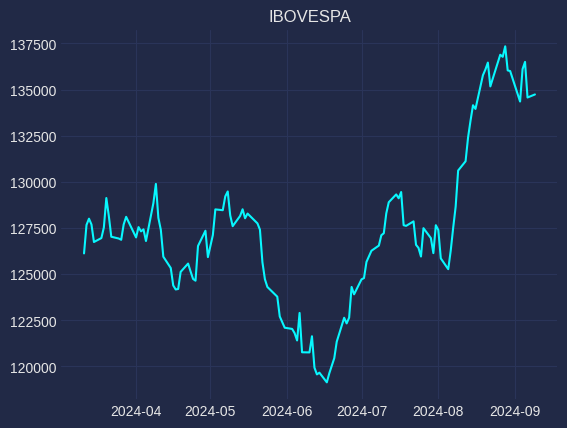

In [11]:
plt.plot(dados_mercado['IBOVESPA'])
plt.title('IBOVESPA')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/ibovespa.png')


plt.show()
